# Final Webapp

This is the final dash webapp using the second model, using CNN, RNN, and CTC Loss.

Warning: This webapp requires loading model with "ocr_model_8.keras" filename. This is the trained model.

The preprocess_image and decode_ctc functions are used to do similar things in the codes in notebook previously- process input image into processable form,
and decode numeric representation of words into readable alphabetical words.
Then, the predict_text1 function will predict the word using model and these functions.

First, the trained model is loaded-which is trained 40 epochs until there is no more loss decrease.
Then there would be a button to upload an image file, which is put into input argument of handle_image, which does all the processing and predicting internal works.

The website is designed with the goal of giving Matrix computer console vibe, so that it feels futuristic and tech-y.

In [1]:
import dash
from dash import html, dcc, Output, Input
import base64
import tensorflow as tf
import numpy as np
import io
from PIL import Image
import socket

import myProject # Import the package that contains my py files for functions and classes
from myProject import model2
from myProject.model2 import preprocess_image, predict_text1, find_free_port, handle_image

# Load model
model = tf.keras.models.load_model("ocr_model_8.keras", compile=False)

# Image dimensions from training
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 300

# Character decoding function
characters = ['!', '"', "'", '(', ')', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

char_to_num = tf.keras.layers.StringLookup(vocabulary=characters, num_oov_indices=1)
num_to_char = tf.keras.layers.StringLookup(vocabulary=char_to_num.get_vocabulary(), num_oov_indices=1, invert=True, mask_token=None)

# Build the Dash app
app = dash.Dash(__name__)
app.title = "OCR Console"

app.layout = html.Div([
    html.H1("OCR - Image Word Recognizer", style={
        'textAlign': 'center',
        'color': '#00FF00',
        'fontFamily': 'Courier New',
        'fontSize': '36px',
        'marginBottom': '30px',
        'textShadow': '0 0 10px #00FF00'
    }),

    dcc.Upload(
        id='upload-image',
        children=html.Div(['[ DROP FILE HERE ] or ', html.A('SELECT IMAGE')]),
        style={
            'width': '70%',
            'height': '120px',
            'lineHeight': '120px',
            'borderWidth': '2px',
            'borderStyle': 'dashed',
            'borderRadius': '10px',
            'textAlign': 'center',
            'margin': 'auto',
            'backgroundColor': '#000000',
            'color': '#00FF00',
            'fontSize': '20px',
            'fontFamily': 'Courier New',
            'transition': '0.3s ease',
            'textShadow': '0 0 5px #00FF00'
        },
        multiple=False
    ),

    html.Div(id='output', style={
        'textAlign': 'center',
        'marginTop': '40px',
        'color': '#00FF00',
        'fontFamily': 'Courier New, monospace',
        'fontSize': '20px'
    }),
], style={
    'backgroundColor': '#000000',
    'height': '100vh',
    'padding': '40px'
})

@app.callback(
    Output('output', 'children'),
    Input('upload-image', 'contents')
)

if __name__ == '__main__':
    port = find_free_port()
    print(f"Running on http://127.0.0.1:{port}")
    app.run_server(debug=True, port=port)

2025-03-21 05:18:44.147409: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Running on http://127.0.0.1:61283


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


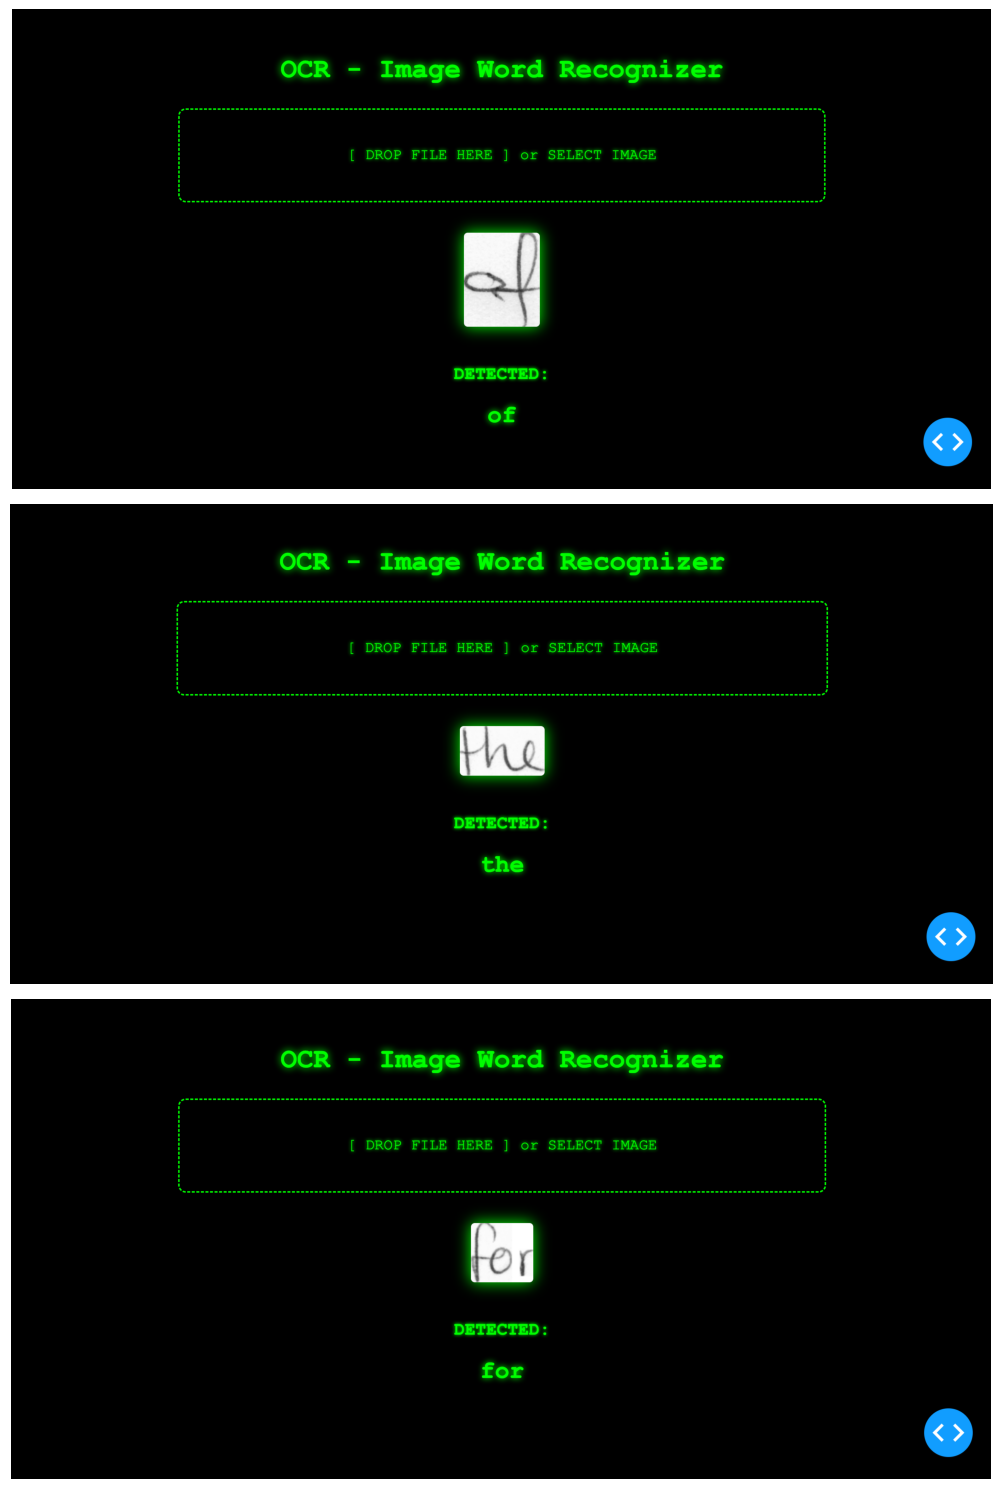

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axes = plt.subplots(3, 1, figsize=(15, 15))  # 3 rows, 1 column

img_paths = ['success_1.png', 'success_2.png', 'success_3.png']

for ax, path in zip(axes, img_paths):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()


